<a href="https://colab.research.google.com/github/GuillaumeArp/Wild_Notebooks/blob/main/ML_challenge_Regressions_Weather_Guillaume_Arp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


# Merge
First of all, you have to merge both DataFrames to have a new DataFrame "df2018" DataFrame with 365 rows and 20 columns (indeed, you can drop the date column in double).



In [ ]:
# Your code here :

df2018 = pd.merge(df_main, df_opinion, how="left", left_on='DATE', right_on='date')

In [ ]:
df2018.drop('date', axis=1, inplace=True)

In [ ]:
df2018.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad


In [ ]:
df2018.shape

(365, 20)

In [ ]:
df2018['DATE'] = pd.to_datetime(df2018['DATE'])

# Linear regresssion
There are some missing values in the "Sunhour" column, and you want to fill them.

First, you have to split the DataFrame to have :
- a DF with only rows without NaN, you'll call it "df_clean". This DF should have 341 rows and 20 columns.
- a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan". This DF should have 24 rows and 20 columns.


In [ ]:
# Your code here :

df2018['flag'] = df2018['SUNHOUR'].isna()

df_clean = df2018.dropna(subset=['SUNHOUR'])
df_clean.shape

(341, 21)

In [ ]:
df_nan = df2018[df2018['SUNHOUR'].isna()]
df_nan.shape

(24, 21)

## Now, train your model
For this part, let's work on df_clean. 
With scikit-learn, find the multivariate linear regression model with the best score (remember to train-test-split your DataFrame "df_clean" before!). 

You are trying to predict `SUNHOUR`, so what's your target `y` ?

Print the R2-score for the test set, and check if you don't have underfitting or overfitting.

In [ ]:
# Your code here

X = df_clean[['MAX_TEMPERATURE_C','MIN_TEMPERATURE_C','WINDSPEED_MAX_KMH',
              'PRECIP_TOTAL_DAY_MM','HUMIDITY_MAX_PERCENT','VISIBILITY_AVG_KM',
              'PRESSURE_MAX_MB','CLOUDCOVER_AVG_PERCENT','HEATINDEX_MAX_C']]
y = df_clean['SUNHOUR']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
model = LinearRegression().fit(X_train, y_train)

print("\nScore for the Train dataset :", model.score(X_train, y_train))
print("Score for the Test dataset :", model.score(X_test, y_test))

# Not so good, let's try again.


Score for the Train dataset : 0.6831493095565511
Score for the Test dataset : 0.5756605790388758


In [ ]:
X = df_clean[['MAX_TEMPERATURE_C','MIN_TEMPERATURE_C','WINDSPEED_MAX_KMH',
              'TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C','TEMPERATURE_EVENING_C',
              'PRECIP_TOTAL_DAY_MM','HUMIDITY_MAX_PERCENT','VISIBILITY_AVG_KM',
              'PRESSURE_MAX_MB','CLOUDCOVER_AVG_PERCENT','HEATINDEX_MAX_C',
              'DEWPOINT_MAX_C','WINDTEMP_MAX_C']]
y = df_clean['SUNHOUR']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
model = LinearRegression().fit(X_train, y_train)

print("\nScore for the Train dataset :", model.score(X_train, y_train))
print("Score for the Test dataset :", model.score(X_test, y_test))

# Still some slight overfitting


Score for the Train dataset : 0.7484627749573181
Score for the Test dataset : 0.6867969358464602


In [ ]:
X = df_clean[['MIN_TEMPERATURE_C', 'MAX_TEMPERATURE_C','PRECIP_TOTAL_DAY_MM',
              'HUMIDITY_MAX_PERCENT','VISIBILITY_AVG_KM','PRESSURE_MAX_MB',
              'CLOUDCOVER_AVG_PERCENT','HEATINDEX_MAX_C','WEATHER_CODE_EVENING']]
y = df_clean['SUNHOUR']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
model = LinearRegression().fit(X_train, y_train)

print("\nScore for the Train dataset :", model.score(X_train, y_train))
print("Score for the Test dataset :", model.score(X_test, y_test))

# Doesn't look like I can get a better score so let's go back to the second model


Score for the Train dataset : 0.6835110153078812
Score for the Test dataset : 0.574420874061752


In [ ]:
X = df_clean[['MAX_TEMPERATURE_C','MIN_TEMPERATURE_C','WINDSPEED_MAX_KMH',
              'TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C','TEMPERATURE_EVENING_C',
              'PRECIP_TOTAL_DAY_MM','HUMIDITY_MAX_PERCENT','VISIBILITY_AVG_KM',
              'PRESSURE_MAX_MB','CLOUDCOVER_AVG_PERCENT','HEATINDEX_MAX_C',
              'DEWPOINT_MAX_C','WINDTEMP_MAX_C']]
y = df_clean['SUNHOUR']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
model = LinearRegression().fit(X_train, y_train)

print("\nScore for the Train dataset :", model.score(X_train, y_train))
print("Score for the Test dataset :", model.score(X_test, y_test))


Score for the Train dataset : 0.7484627749573181
Score for the Test dataset : 0.6867969358464602


In [ ]:
X_2 = df_clean[['MAX_TEMPERATURE_C','MIN_TEMPERATURE_C','WINDSPEED_MAX_KMH',
              'TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C','TEMPERATURE_EVENING_C',
              'PRECIP_TOTAL_DAY_MM','HUMIDITY_MAX_PERCENT','VISIBILITY_AVG_KM',
              'PRESSURE_MAX_MB','CLOUDCOVER_AVG_PERCENT','HEATINDEX_MAX_C',
              'DEWPOINT_MAX_C','WINDTEMP_MAX_C']]

## Predictions
Predict the sunhours values for your DF "df_nan", and store result in the `SUNHOUR` column (which is empty, because this is `df_nan`).

In [ ]:
# Your code here :

df_nan['SUNHOUR'] = model.predict(df_nan[['MAX_TEMPERATURE_C','MIN_TEMPERATURE_C','WINDSPEED_MAX_KMH',
              'TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C','TEMPERATURE_EVENING_C',
              'PRECIP_TOTAL_DAY_MM','HUMIDITY_MAX_PERCENT','VISIBILITY_AVG_KM',
              'PRESSURE_MAX_MB','CLOUDCOVER_AVG_PERCENT','HEATINDEX_MAX_C',
              'DEWPOINT_MAX_C','WINDTEMP_MAX_C']])

df_nan.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,NaN,NaN,NaN,7.404351,NaN,True
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,NaN,NaN,NaN,8.123330,NaN,True
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,NaN,NaN,NaN,7.631020,NaN,True
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,NaN,NaN,NaN,9.596273,NaN,True
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,NaN,NaN,NaN,6.326108,NaN,True


## Concatenate and scatterplot

Concatenate both DataFrames to a new one "df2018complete", and draw a scatterplot with Date on X-axis and Sunhours on Y-axis.
Try to add a flag to identify real values and predicted values. 

You should get something like that. Of course, not exactly the same chart, because we don't train the same model, on the same columns, etc...

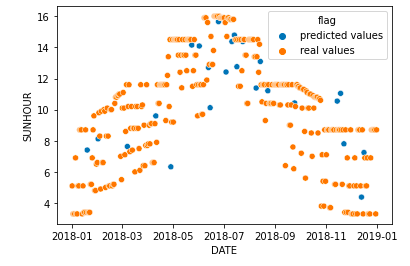

In [ ]:
# Your code here

df2018complete = pd.concat([df_clean, df_nan])
df2018complete.reset_index(drop=True, inplace=True)

In [ ]:
df2018complete.sort_values(by='DATE')
df2018complete.tail()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
360,2018-11-14,15,7,16,7,15,12,0.0,83,9.000,1027,22.000,16,13,8,NaN,NaN,NaN,10.548644,NaN,True
361,2018-11-18,9,4,27,4,9,6,0.0,77,10.000,1018,0.375,9,3,1,NaN,NaN,NaN,11.046939,NaN,True
362,2018-11-22,12,2,16,3,10,8,0.8,90,9.625,1014,44.500,12,8,2,NaN,NaN,NaN,7.804186,NaN,True
363,2018-12-13,3,2,23,3,3,2,1.4,86,8.875,1014,88.875,3,1,-3,NaN,NaN,NaN,4.381186,NaN,True
364,2018-12-16,12,7,23,7,12,9,1.6,91,10.000,1015,48.375,12,7,6,NaN,NaN,NaN,7.243871,NaN,True


In [ ]:
df2018complete['flag'].replace({True: 'predicted values', False: 'real values'}, inplace=True)

In [ ]:
df2018complete.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad,real values
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad,real values
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad,real values
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad,real values
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad,real values


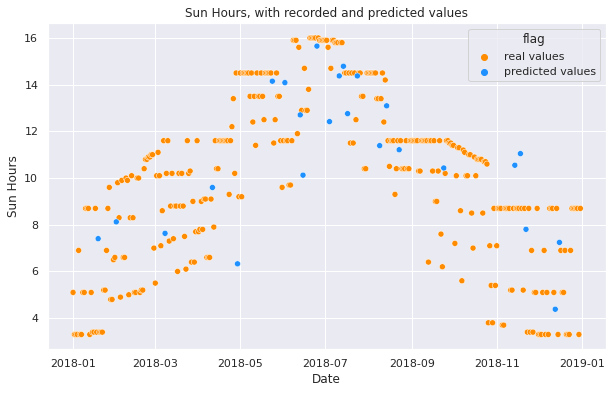

In [ ]:
sns.set_theme()
ax = plt.figure(figsize=(10,6))

ax = sns.scatterplot(data=df2018complete, x='DATE', y='SUNHOUR', hue='flag', palette=['darkorange', 'dodgerblue'])
ax = plt.title('Sun Hours, with recorded and predicted values')
ax = plt.xlabel('Date')
ax = plt.ylabel('Sun Hours')

plt.show()